In [91]:
%matplotlib inline

import random

import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
import statsmodels.formula.api as smf

sns.set_context("talk")

# Anscombe's quartet

Anscombe's quartet comprises of four datasets, and is rather famous. Why? You'll find out in this exercise.

In [114]:
anascombe = pd.read_csv('data/anscombe.csv')
anascombe.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


## Part 1

For each of the four datasets...
 - Compute the mean and variance of both **x** and **y**

In [93]:
x = anascombe["x"]
y = anascombe["y"]
print("----------------- mean ----------------------")
print(anascombe.mean())
print("--------------- variance --------------------")
print(anascombe.var())

----------------- mean ----------------------
x    9.000000
y    7.500682
dtype: float64
--------------- variance --------------------
x    10.232558
y     3.837388
dtype: float64


 - Compute the correlation coefficient between **x** and **y**

In [94]:
print("-------- correlation coefficient ------------")
anascombe.corr()

-------- correlation coefficient ------------


,x,y
x,1.000000,0.816366
y,0.816366,1.000000


 - Compute the linear regression line: $y = \beta_0 + \beta_1 x + \epsilon$ (hint: use statsmodels and look at the Statsmodels notebook)

In [97]:
lin_model = smf.OLS(y,x).fit()
lin_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                     1109.
Date:                Mon, 11 Jun 2018   Prob (F-statistic):           2.47e-32
Time:                        09:57:47   Log-Likelihood:                -80.183
No. Observations:                  44   AIC:                             162.4
Df Residuals:                      43   BIC:                             164.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x              0.7968      0.024     33.296      0.000       0.749       0.845
==============================================================================
Omnibus:                        3.004   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.223   Jarque-Bera (JB):                2.824
Skew:                          -0.569   Prob(JB):                        0.244
Kurtosis:                       2.505   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

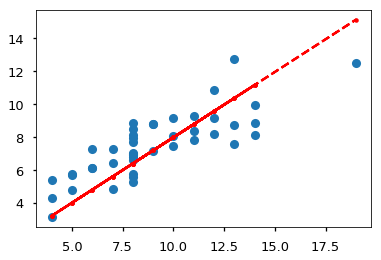

In [105]:
f, ax = plt.subplots()
ax.plot(x, y, 'o', label="data")
t = lin_model.predict
ax.plot(x, lin_model.fittedvalues, 'r--.', label="OLS")


## Part 2

Using Seaborn, visualize all four datasets. 

*hint: use sns.FacetGrid combined with plt.scatter*

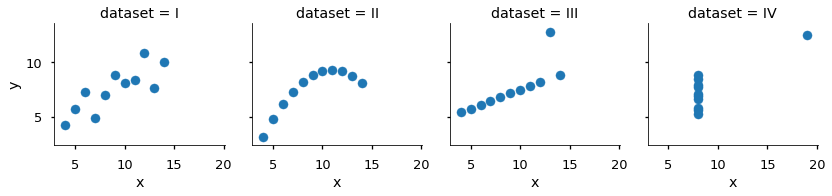

In [112]:
g = sns.FacetGrid(anascombe, col="dataset")
g.map(plt.scatter, "x", "y")